# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

## Problem:
### Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi ?


## Detaylar:
### Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.
### Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

### Hipotezimiz:

### H0: μ = 170
### H1: μ ≠ 170

### H0 hipotezi: web sitesinde geçirilen süre 170 saniyeye eşittir.
### H1 hipotezi: web sitesinde geçirilen süre 170 saniyeye eşit değildir.

# --------------------------------------------------------

In [43]:
import numpy as np
import pandas as pd

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 157, 145, 127, 244, 163, 114, 145, 65,
                    112, 185, 202, 146, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 216, 138, 151, 166, 135,
                    155, 84, 251, 173, 131, 207, 121, 120])
olcumler.mean()

151.91666666666666

In [44]:
import scipy.stats as stats

In [45]:
stats.describe(olcumler)

DescribeResult(nobs=48, minmax=(17, 251), mean=151.91666666666666, variance=2528.1205673758864, skewness=-0.27584473189592734, kurtosis=0.0234687854278377)

### olcumler veri seti bir örneklem. Bu örneklemin ortalaması 151 saniye. Oysa ki H0 hipotezi 170 saniye olma durumunu savunuyordu. Fakat bir populasyondan çekilen örneklemin ortalaması rassal değişkendir. Yani değişebilir. Bu yüzden varsayımlar üzerinden devam edeceğiz.

# Varsayımlar

## Normallik Varsayımı
#### İstatistikte normal dağılım, birçok doğal olayın dağılımının takip ettiği bir olasılık dağılımıdır. Normal dağılımın oluşabilmesi için bazı koşullar vardır ve bu koşullara 'normallik varsayımı' denir. Normallik varsayımı, bir veri setinin normal dağılımı takip edip etmediğini belirlemek için kullanılır. Bu varsayım, veri setinin normal dağılıma sahip olduğu durumlarda kullanılan parametrik istatistiksel testlerin geçerliliğini sağlamak için gereklidir. 
#### Normallik varsayımı, veri setinin dağılımının simetrik olduğu, ortalamasının medyanına eşit olduğu, dağılımın kuyruklarının simetrik olduğu ve aykırı değerlerin olmadığı durumlarda sağlanmaktadır. Bununla birlikte, pratikte veriler her zaman tam olarak normal dağılımı takip etmezler. Bu nedenle, normallik varsayımının sağlanığ sağlanmadığını belirlemek için çeşitli istatistiksel yöntemler kullanılır. Bu yöntemler arasında normal olasılık çizelgesi, histogram ve QQ plot gibi grafiksel yöntemler ve Shapiro-Wilk testi, Kolmogorov-Smirnov testi, Anderson-Darling testi ve Lilliefors testi gibi istatistiksel testler yer almaktadır.

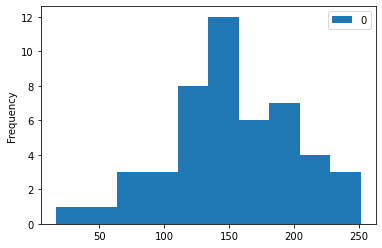

In [46]:
# Histogram in Pandas
pd.DataFrame(olcumler).plot.hist();

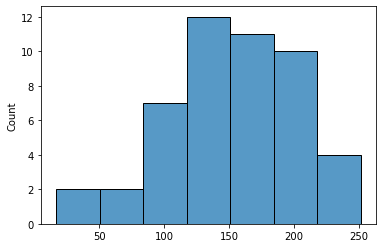

In [47]:
## Histogram in Seaborn
import seaborn as sns

sns.histplot(olcumler);

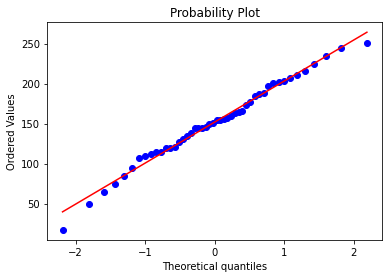

In [48]:
## QQ Plot
import pylab

stats.probplot(olcumler, dist='norm', plot=pylab)
pylab.show()

In [49]:
## Shapiro-Wilks Testi

# H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Fark vardır.

from scipy.stats import shapiro

shapiro(olcumler)
# (soldaki değer test istatistiğini, sağdaki değer ise p-value değerini ifade ediyor.)

ShapiroResult(statistic=0.9877386689186096, pvalue=0.8924198150634766)

In [50]:
## Hipotez Testinin Uygulanması

stats.ttest_1samp(olcumler, popmean=170)

Ttest_1sampResult(statistic=-2.4917256080813424, pvalue=0.016298072414146044)

In [51]:
## H0: Web sitemizde geçirilen ortalama süre 170 saniyedir.
## H1 : Web sitemizde geçirilen ortalama süre 170 saniye değildir.

## P-Value değerimiz kabul edilen alfa değerinden (0.05) küçük olduğu için H0 hipotezi reddedilmiştir. Bu demektir ki, Web sitesinde geçirilen ortalama süre 170 saniye değildir. H0 hipotezi reddedilmiştir.

## H0 hipotezi reddedildiği için bu örneklem parametrik değildir. Şimdi ise Nonparametrik tek örneklem testi yapalım

# Nonprametrik Tek Örneklem Testi

In [52]:
from statsmodels.stats.descriptivestats import sign_test

In [53]:
sign_test(olcumler, 170)

(-8.0, 0.029304946720529308)